In [ ]:
''''''
# Crash severity using AutoML
# Author:   Amir Rafe (amir.rafe@usu.edu)
# File:     CrashAutoML.ipynb
# Date:     Fall 2023
# Version:  1.05  
# About:    Crash Severity Analysis using Automated Machine Learning (AutoML) method
''''''

In [6]:
## Loading packages
import pandas as pd
from pycaret.classification import *
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Data preparation

In [2]:
# Load data
Ped_df = pd.read_csv('df2.csv')

# Select features
features1 = ['PersonType','Sex', 
                        'AgeText',
                       'Aggressive','AlcoholSuspected',
                       'AlcResult',
                       'UrbanRural','FunctionClass','CommercialMotorVehInvolved'
                       'Light','Weather','RoadwaySurf','DisregardTrafficControl','DistractedDriving','DomesticAnimalRelated',
                       'DrowsyDriving','DrugsSuspected','OlderDriverInvolved'
                       'TeenageDriverInvolved','DUI','HeavyTruckInvolved',
                       'OverturnRollover','RightTurn','TransitVehicleInvolved','HolidayCrash','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved','WrongWayDriving'
                       ]
                       
features2 = ['Sex', 'AgeText',
                       'AlcResult',
                       'UrbanRural','FunctionClass',
                       'Light','Weather','RoadwaySurf', 
                       'DUI', 'DistractedDriving', 'TeenageDriverInvolved',
                       'RightTurn','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved'
                       ]    
                                          
features3 = ['Sex', 'AgeText',
                       'Aggressive',
                       'AlcResult', 'CommercialMotorVehInvolved',
                       'UrbanRural','FunctionClass',
                       'Light','Weather','RoadwaySurf','DrowsyDriving', 'DistractedDriving',
                       'DUI','TeenageDriverInvolved','HeavyTruckInvolved',
                       'RightTurn','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved', 'WrongWayDriving'
                       ]

X = Ped_df[features2]
y = Ped_df['Severity']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20,random_state=2021)

# Apply the SMOTE-Tomek method to handle data imbalance
smote = SMOTETomek(random_state=2021)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

# Combine features and target into a single DataFrame
data = X_train_over
data['Severity'] = y_train_over

# Setting up the AutoML

In [3]:
# Setting up the environment in PyCaret with imbalance handling
clf1 = setup(data, target='Severity', session_id=123, 
             normalize=True, transformation=True, 
             remove_multicollinearity=True, multicollinearity_threshold=0.9,
             fix_imbalance=True, fix_imbalance_method=SMOTE(), feature_selection = False)

# Compare models with a focus on F1 
best_model = compare_models(sort='F1')

# Create a model
model = create_model(best_model)

# Tune the model (Hyperparameter tuning)
tuned_model = tune_model(model, optimize='F1')

# Evaluate the model
evaluate_model(tuned_model)
evaluate_model(model)

# Finalize the model
final_model = finalize_model(tuned_model)

# Save the model
save_model(final_model, 'final_model')

,Description,Value
0,Session id,123
1,Target,Severity
2,Target type,Multiclass
3,Original data shape,"(16792, 18)"
4,Transformed data shape,"(16945, 18)"
5,Transformed train set shape,"(11907, 18)"
6,Transformed test set shape,"(5038, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8270,0.9411,0.8270,0.8264,0.8260,0.7405,0.7411,0.2910
et,Extra Trees Classifier,0.8177,0.9315,0.8177,0.8170,0.8170,0.7265,0.7268,0.2830
xgboost,Extreme Gradient Boosting,0.8045,0.9307,0.8045,0.8060,0.8039,0.7067,0.7078,0.2140
catboost,CatBoost Classifier,0.8018,0.9288,0.8018,0.8024,0.8010,0.7026,0.7035,2.5780
dt,Decision Tree Classifier,0.8011,0.8647,0.8011,0.8016,0.7998,0.7016,0.7028,0.0980
lightgbm,Light Gradient Boosting Machine,0.7851,0.9204,0.7851,0.7863,0.7845,0.6776,0.6786,0.5620
knn,K Neighbors Classifier,0.7506,0.8866,0.7506,0.7503,0.7497,0.6259,0.6265,0.1210
gbc,Gradient Boosting Classifier,0.6944,0.8659,0.6944,0.6986,0.6951,0.5415,0.5425,0.6870
ada,Ada Boost Classifier,0.6579,0.7972,0.6579,0.6608,0.6581,0.4867,0.4876,0.1610
lr,Logistic Regression,0.6023,0.7870,0.6023,0.6020,0.6004,0.4031,0.4043,0.6510


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8257,0.9369,0.8257,0.8241,0.8241,0.7384,0.7392
1,0.8265,0.9420,0.8265,0.8265,0.8253,0.7397,0.7408
2,0.8367,0.9423,0.8367,0.8360,0.8361,0.7551,0.7553
3,0.8189,0.9379,0.8189,0.8182,0.8174,0.7282,0.7292
4,0.8281,0.9391,0.8281,0.8267,0.8269,0.7421,0.7425
5,0.8357,0.9447,0.8357,0.8360,0.8348,0.7535,0.7545
6,0.8426,0.9500,0.8426,0.8415,0.8416,0.7638,0.7642
7,0.8289,0.9389,0.8289,0.8280,0.8281,0.7433,0.7437
8,0.8204,0.9346,0.8204,0.8193,0.8195,0.7306,0.7309


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6037,0.7993,0.6037,0.6061,0.6037,0.4054,0.4062
1,0.6241,0.8041,0.6241,0.6671,0.6279,0.4360,0.4465
2,0.6463,0.8225,0.6463,0.6871,0.6492,0.4692,0.4804
3,0.6276,0.8069,0.6276,0.6718,0.6299,0.4413,0.4545
4,0.6153,0.7958,0.6153,0.6641,0.6164,0.4227,0.4356
5,0.6230,0.8061,0.6230,0.6482,0.6228,0.4341,0.4413
6,0.6196,0.8068,0.6196,0.6576,0.6228,0.4289,0.4372
7,0.6102,0.8063,0.6102,0.6623,0.6142,0.4153,0.4313
8,0.6332,0.8134,0.6332,0.6846,0.6357,0.4497,0.4663


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Plot outputs

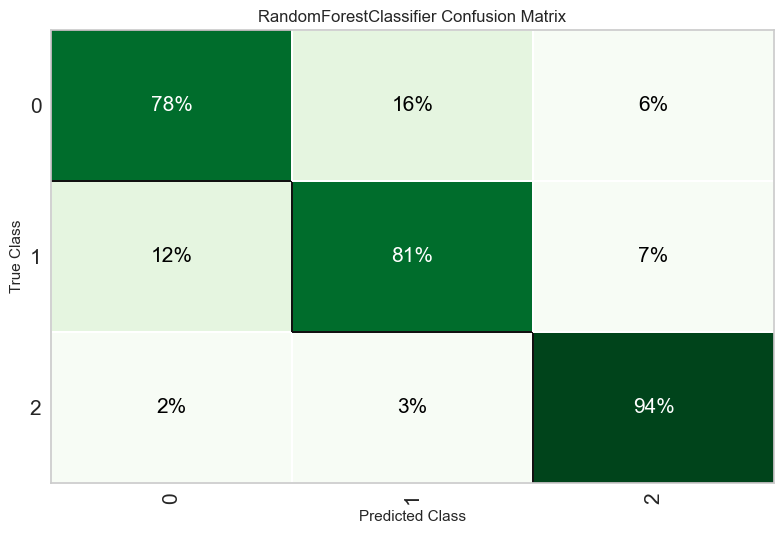

In [2]:
plot_model(model, plot='confusion_matrix',  plot_kwargs = {'percent' : True})

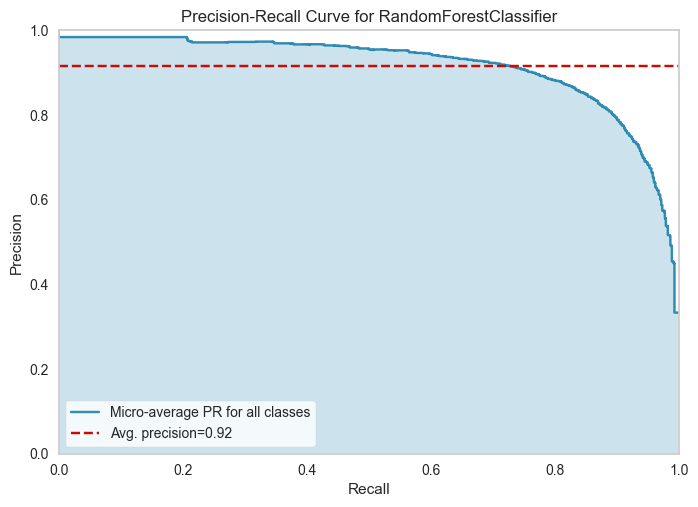

In [3]:
plot_model(model, plot='pr')

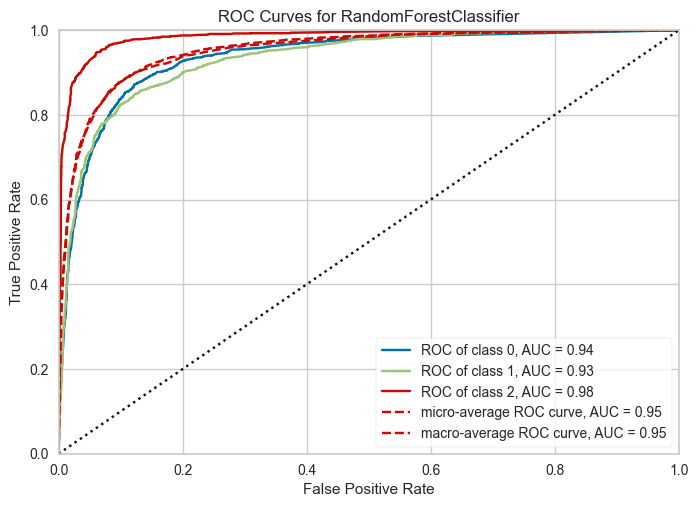

In [4]:
plot_model(model, plot='auc')

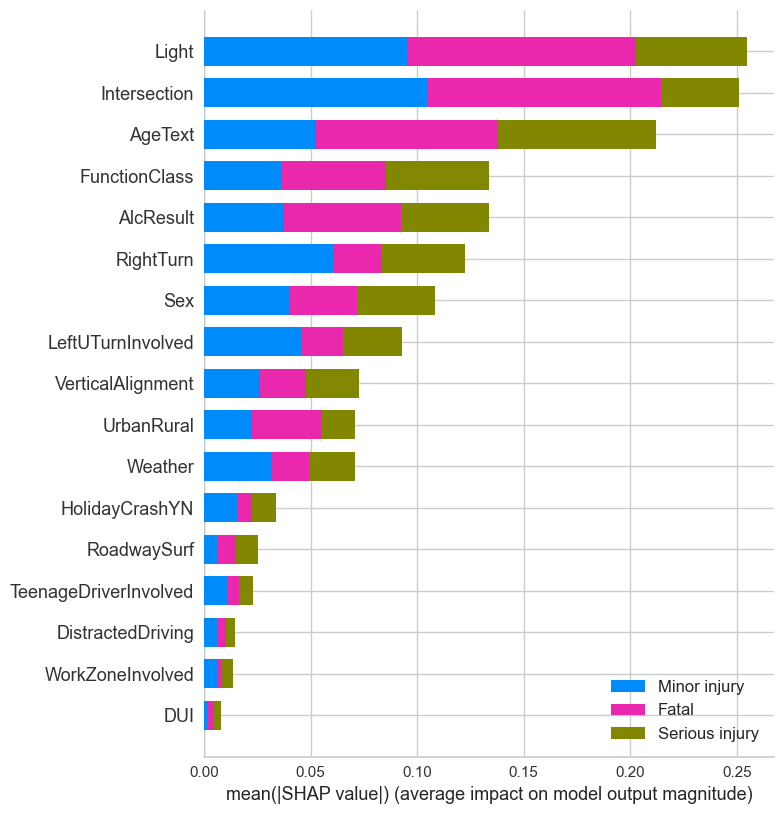

In [4]:
interpret_model (model ,  plot_type= 'bar' , class_names= {
    0: 'Minor injury',
    1: 'Serious injury',
    2: 'Fatal'

})

# Using SHAP values for model interpretation

In [5]:
explainer = shap.Explainer(model, X_train_over)
shap_values = explainer(X_train_over)

100%|===================| 50185/50376 [02:29<00:00]        

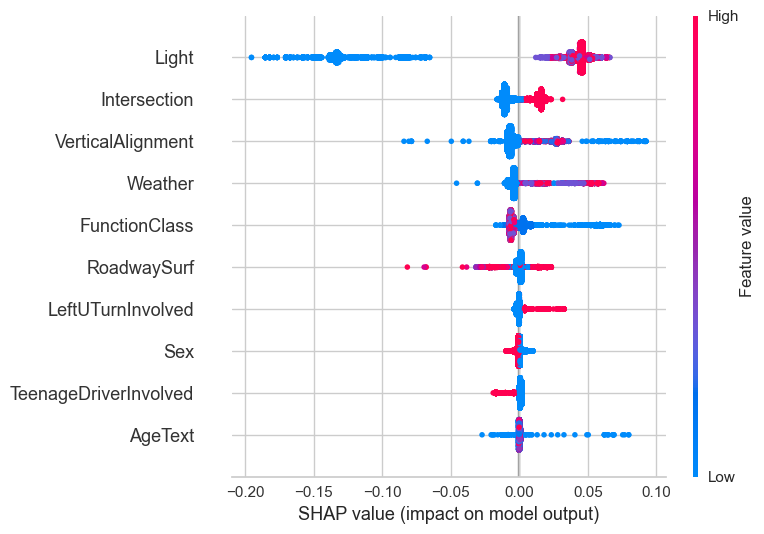

In [7]:
# For example, to plot the SHAP values for the first class
shap.summary_plot(shap_values[:,:,0], X_train_over, max_display=10)

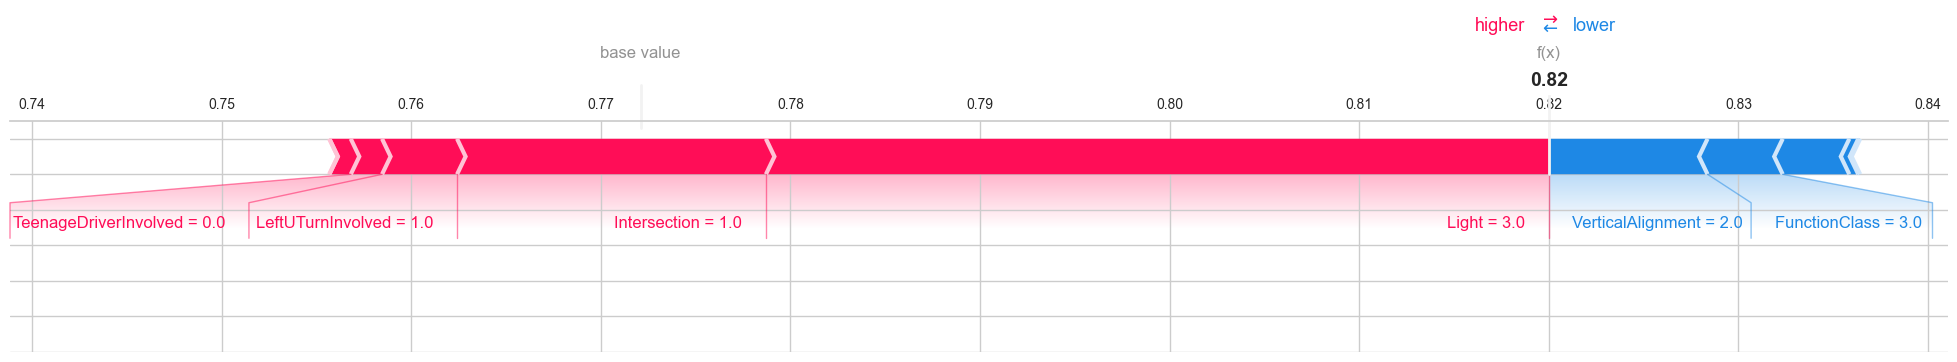

In [15]:
shap.initjs()
# Select the observation index you want to analyze
observation_index = 613

# Extract SHAP values for the selected observation for class 0
shap_values_for_observation_class_0 = shap_values[observation_index, :, 0]

# Extract the base value for class 0
base_value_class_0 = explainer.expected_value[0]

# Create an Explanation object
expl = shap.Explanation(values=shap_values_for_observation_class_0,
                        base_values=base_value_class_0,
                        data=X_train_over.iloc[observation_index,:],
                        feature_names=X_train_over.columns)

# Create the force plot for the selected observation and class 0
shap.force_plot(expl, figsize=(25,3), matplotlib=True)

# Loading the saved model

In [ ]:
# Import necessary libraries
import pandas as pd
from pycaret.classification import *
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load data
Ped_df = pd.read_csv('df2.csv')

features1 = ['PersonType','Sex', 
                        'AgeText',
                       'Aggressive','AlcoholSuspected',
                       'AlcResult',
                       'UrbanRural','FunctionClass','CommercialMotorVehInvolved'
                       'Light','Weather','RoadwaySurf','DisregardTrafficControl','DistractedDriving','DomesticAnimalRelated',
                       'DrowsyDriving','DrugsSuspected','OlderDriverInvolved'
                       'TeenageDriverInvolved','DUI','HeavyTruckInvolved',
                       'OverturnRollover','RightTurn','TransitVehicleInvolved','HolidayCrash','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved','WrongWayDriving'
                       ]
                       
features2 = ['Sex', 'AgeText',
                       'AlcResult',
                       'UrbanRural','FunctionClass',
                       'Light','Weather','RoadwaySurf', 
                       'DUI', 'DistractedDriving', 'TeenageDriverInvolved',
                       'RightTurn','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved'
                       ]    
                                          
features3 = ['Sex', 'AgeText',
                       'Aggressive',
                       'AlcResult', 'CommercialMotorVehInvolved',
                       'UrbanRural','FunctionClass',
                       'Light','Weather','RoadwaySurf','DrowsyDriving', 'DistractedDriving',
                       'DUI','TeenageDriverInvolved','HeavyTruckInvolved',
                       'RightTurn','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved', 'WrongWayDriving'
                       ]

X = Ped_df[features2]
y = Ped_df['Severity']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20,random_state=2021)
smote = SMOTETomek(random_state=2021)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

# Combine features and target into a single DataFrame
data = X_train_over
data['Severity'] = y_train_over

clf1 = setup(data, target='Severity', session_id=123, 
             normalize=True, transformation=True, 
             remove_multicollinearity=True, multicollinearity_threshold=0.9,
             fix_imbalance=True, fix_imbalance_method=SMOTE(), feature_selection = False)

model = load_model('model')
evaluate_model(model)

In [2]:
model

Pipeline(memory=FastMemory(location=C:\Users\graduate\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Sex', 'AgeText', 'AlcResult',
                                             'UrbanRural', 'FunctionClass',
                                             'Light', 'Weather', 'RoadwaySurf',
                                             'DUI', 'DistractedDriving',
                                             'TeenageDriverInvolved',
                                             'RightTurn', 'HolidayCrashYN',
                                             'Intersection',
                                             'LeftUTurnInvolve...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)